In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("creditcard.csv") #class : 부정거래여부  amount : 거래 금액
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Fraud 0.17 % of the dataset


Text(0.5, 1.0, 'Class distribution \n (0:No fraud || 1:Fraud)')

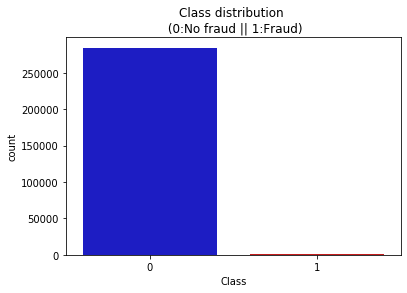

In [2]:
##Class 변수의 범주 비중 보기
print("Fraud", round(data['Class'].value_counts()[1]/len(data)*100, 2), '% of the dataset')

#Class 변수 시각화
colors = ['#0101DF', '#DF0101']
sns.countplot('Class', data=data, palette = colors)
plt.title('Class distribution \n (0:No fraud || 1:Fraud)')

Text(0.5, 1.0, 'Distribution of Transcation Time')

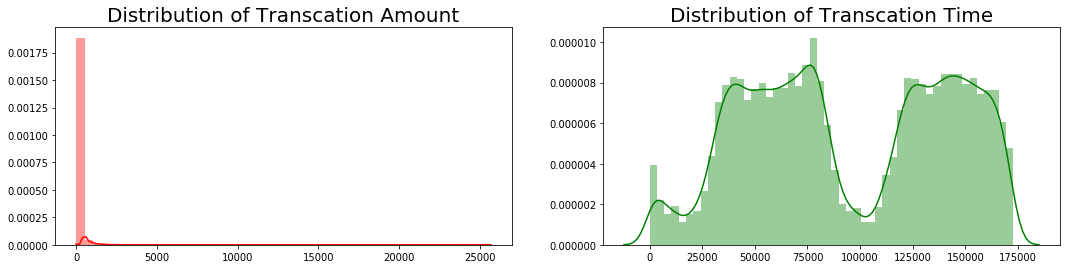

In [3]:
#Time, Amount 변수의 분포 시각화
fig,ax = plt.subplots(1,2,figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title("Distribution of Transcation Amount", fontsize=20)

sns.distplot(time_val, ax=ax[1], color='g')
ax[1].set_title("Distribution of Transcation Time", fontsize=20)

V1-V28 칼럼은 PCA가 진행되어 scaling 되어있지만, Time과 Amount 피쳐는 스케일링 되지 않은 상태이기 때문에 이 두 피쳐도 다른 칼럼처럼 스케일링을 진행

In [4]:
##data 전처리
from sklearn.preprocessing import RobustScaler #이상치에 둔감한 RobustScaler()를 사용

rob_scaler = RobustScaler()
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)

scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


데이터 분할

In [13]:
from sklearn.model_selection import StratifiedKFold

X= data.drop('Class', axis=1)
y = data['Class']

sss = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False) #5개의 층으로 분류
for train_index, test_index in sss.split(X,y):
    print("Train : ", train_index, "Test : ", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

#라벨마다 분포확인하기
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#train, test 라벨 분포
#train_unique_label은 유일한 원소(0,1)를 저장하고, train_counts_label은 각 원소의 갯수를 저장한다.
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True) #배열 내에서 중복된 원소를 제외하고 유일한 원소를 정렬 
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True) #각 요소들이 입력 배열에 나타난 횟수 반환
print('-'*100)

#0에 대한 카운트와 1에 대한 카운트를 각각 전체 데이터로 나눈다
print('Label Distribution : \n')
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

Train :  [ 56952  56953  56954 ... 284804 284805 284806] Test :  [    0     1     2 ... 65766 65774 66141]
Train :  [     0      1      2 ... 284804 284805 284806] Test :  [ 56952  56953  56954 ... 128146 128544 128690]
Train :  [     0      1      2 ... 284804 284805 284806] Test :  [113903 113904 113905 ... 180570 180659 180692]
Train :  [     0      1      2 ... 284804 284805 284806] Test :  [170871 170872 170873 ... 228410 228456 228598]
Train :  [     0      1      2 ... 228410 228456 228598] Test :  [227841 227842 227843 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distribution : 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


언더샘플링 : 불균형 데이터를 균형 데이터로 만들기
1. 데이터가 얼마나 불균형한지 확인
2. 많은 클래스를 적은 클래스에 맞추어 50:50 비율로 맞추기
3. 각 클래스 별로 비율이 같으면 데이터 셔플

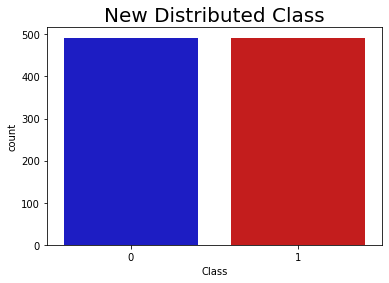

In [6]:
data = data.sample(frac=1) #랜덤 언더샘플링
fraud_data = data.loc[data['Class'] == 1]   #이상 데이터
non_fraud_data = data.loc[data['Class'] == 0][:492]  #정상 데이터
norma_distributed_data = pd.concat([fraud_data, non_fraud_data]) #fraud data와 non_fraud data결합

#데이터 셔플
new_data = norma_distributed_data.sample(frac=1, random_state=42)
new_data.head(10)

#class 비율이 동등해졌는지 확인
colors = ['#0101DF', '#DF0101']
sns.countplot('Class', data=new_data, palette=colors)
plt.title("New Distributed Class", fontsize=20)
plt.show()

언더샘플링 상관관계 행렬 확인
1. Class와 음의 상관관계인 요소 : V17, V14, V12, V10 
2. Class와 양의 상관관계인 요소 : V2, V4, V11, V19

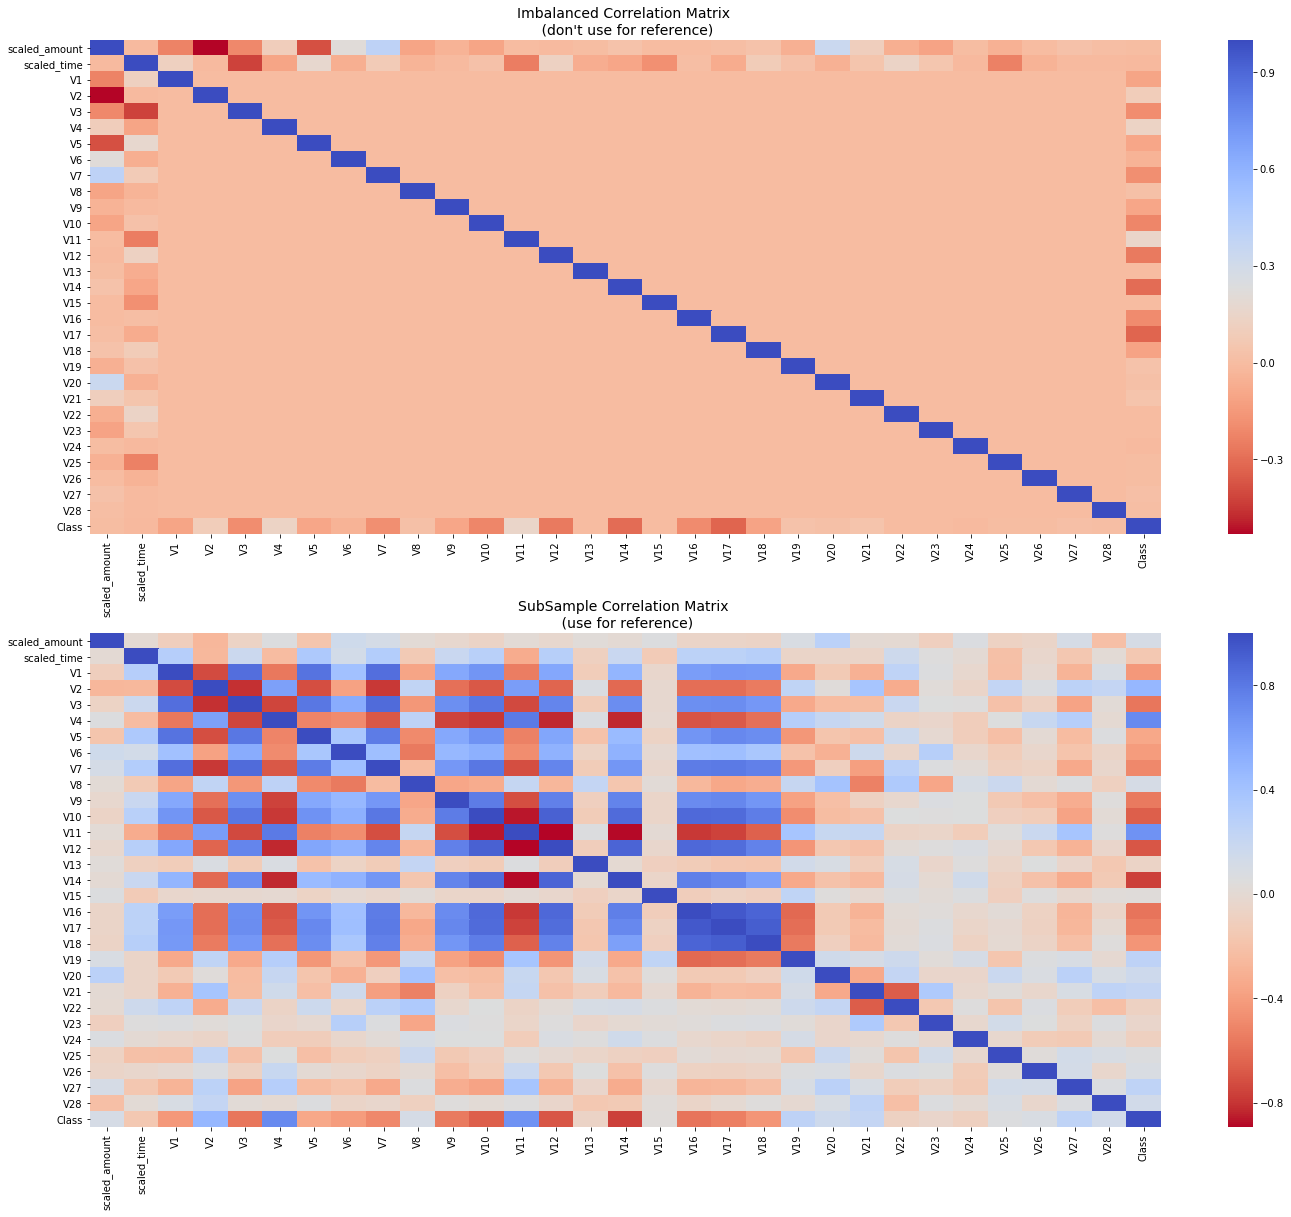

In [14]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(24,20))

corr = data.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws = {'size' : 20}, ax = ax1) #2개의 카테고리 값에 대한 값 변화 확인
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize = 14)  #전체 데이터의 상관관계 행렬

sub_sample_corr = new_data.corr()
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot_kws = {'size' : 20}, ax = ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize = 14)  #서브 데이터의 상관관계 행렬

plt.show()  #파랑색이 양의 상관관계, 빨강색이 음의 상관관계

Text(0.5, 1.0, 'V10')

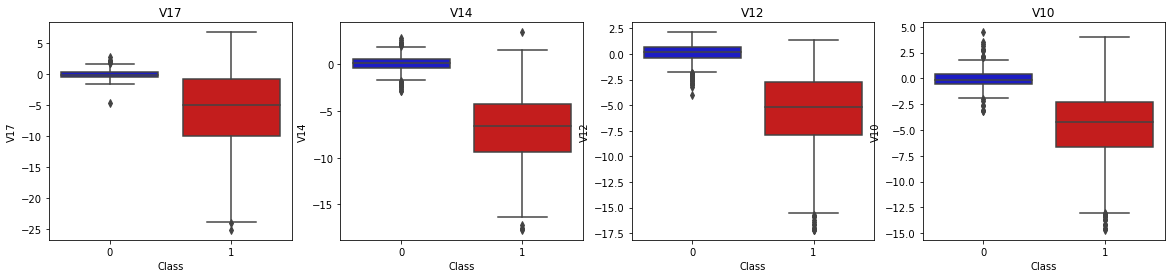

In [18]:
#음의 상관관계를 갖는 요소의 박스플롯(V17, V14, V12, V10)
f, axes = plt.subplots(ncols = 4, figsize = (20,4))
colors = ['#0101DF', '#DF0101']

sns.boxplot(x = "Class", y = "V17", data = new_data, palette = colors, ax = axes[0])
axes[0].set_title("V17")

sns.boxplot(x = "Class", y = "V14", data = new_data, palette = colors, ax = axes[1])
axes[1].set_title("V14")

sns.boxplot(x = "Class", y = "V12", data = new_data, palette = colors, ax = axes[2])
axes[2].set_title("V12")

sns.boxplot(x = "Class", y = "V10", data = new_data, palette = colors, ax = axes[3])
axes[3].set_title("V10")
#모든 요소가 작을수록 Fraud = 1

Text(0.5, 1.0, 'V19')

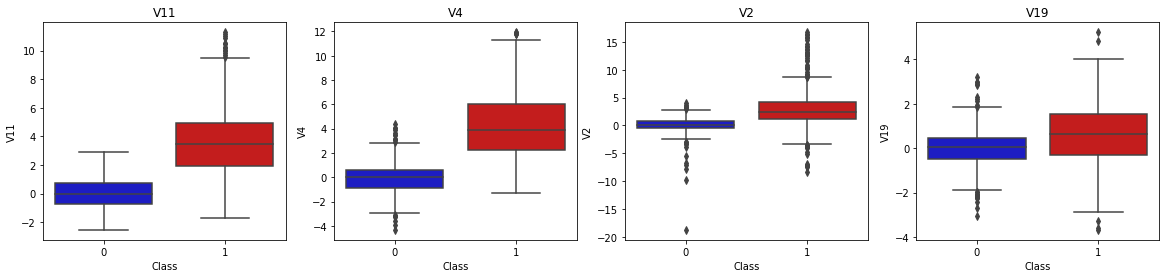

In [19]:
#양의 상관관계를 갖는 요소의 박스플롯(V2, V4, V11, V19)
f, axes = plt.subplots(ncols = 4, figsize = (20,4))
colors = ['#0101DF', '#DF0101']

sns.boxplot(x = "Class", y = "V11", data = new_data, palette = colors, ax = axes[0])
axes[0].set_title("V11")

sns.boxplot(x = "Class", y = "V4", data = new_data, palette = colors, ax = axes[1])
axes[1].set_title("V4")

sns.boxplot(x = "Class", y = "V2", data = new_data, palette = colors, ax = axes[2])
axes[2].set_title("V2")

sns.boxplot(x = "Class", y = "V19", data = new_data, palette = colors, ax = axes[3])
axes[3].set_title("V19")

#모든 요소가 클수록 Fraud=1

이상치 확인 : 클래스와 상관관계가 매우 높은 피처에서 극단적인 이상치 제거

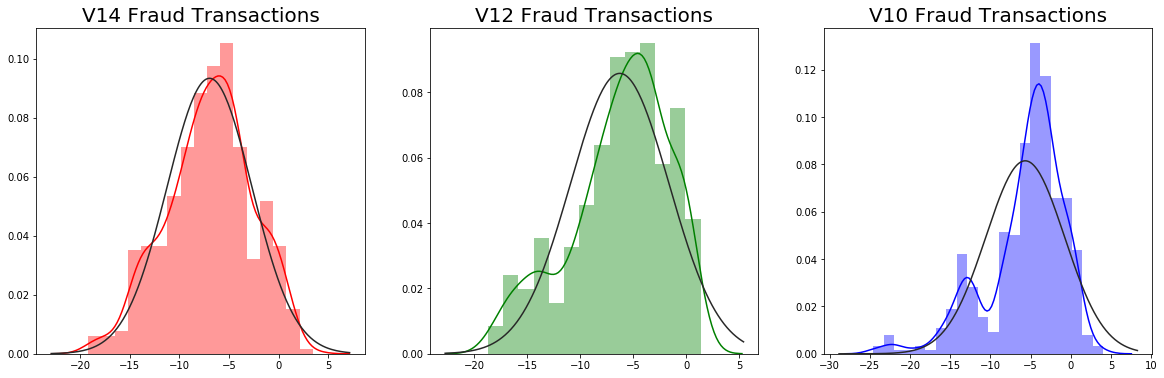

In [10]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))

v14_fraud = new_data['V14'].loc[new_data['Class'] == 1].values
sns.distplot(v14_fraud, ax = ax1, fit = norm, color = 'r')
ax1.set_title('V14 Fraud Transactions', fontsize=20)

v12_fraud = new_data['V12'].loc[new_data['Class'] == 1].values
sns.distplot(v12_fraud, ax = ax2, fit = norm, color = 'g')
ax2.set_title('V12 Fraud Transactions', fontsize=20)

v10_fraud = new_data['V10'].loc[new_data['Class'] == 1].values
sns.distplot(v10_fraud, ax = ax3, fit = norm, color = 'b')
ax3.set_title('V10 Fraud Transactions', fontsize=20)

plt.show()

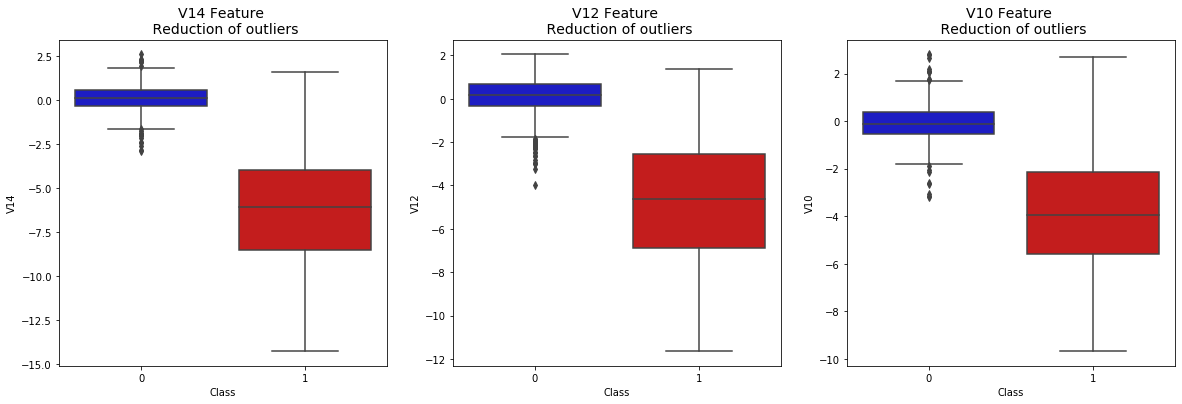

In [25]:
#극단적인 이상치 제거
v14_fraud = new_data['V14'].loc[new_data['Class']==1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)  #사분위수
v14_IQR = q75 - q25
v14_cut_off = v14_IQR*1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
new_data = new_data.drop(new_data[(new_data['V14'] > v14_upper) | (new_data['V14'] < v14_lower)].index)  #이상치 제거

v12_fraud = new_data['V12'].loc[new_data['Class']==1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_IQR = q75 - q25
v12_cut_off = v12_IQR*1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
new_data = new_data.drop(new_data[(new_data['V12'] > v12_upper) | (new_data['V12'] < v12_lower)].index)

v10_fraud = new_data['V10'].loc[new_data['Class']==1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_IQR = q75 - q25
v10_cut_off = v10_IQR*1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
new_data = new_data.drop(new_data[(new_data['V10'] > v10_upper) | (new_data['V10'] < v10_lower)].index)

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))
colors = ['#0101DF', '#DF0101']

#V14 박스플롯
sns.boxplot(x = 'Class', y = 'V14', data = new_data, ax = ax1, palette = colors)
ax1.set_title('V14 Feature \n Reduction of outliers', fontsize = 14)

sns.boxplot(x = 'Class', y = 'V12', data = new_data, ax = ax2, palette = colors)
ax2.set_title('V12 Feature \n Reduction of outliers', fontsize = 14)

sns.boxplot(x = 'Class', y = 'V10', data = new_data, ax = ax3, palette = colors)
ax3.set_title('V10 Feature \n Reduction of outliers', fontsize = 14)

plt.show()

차원축소와 클러스터링

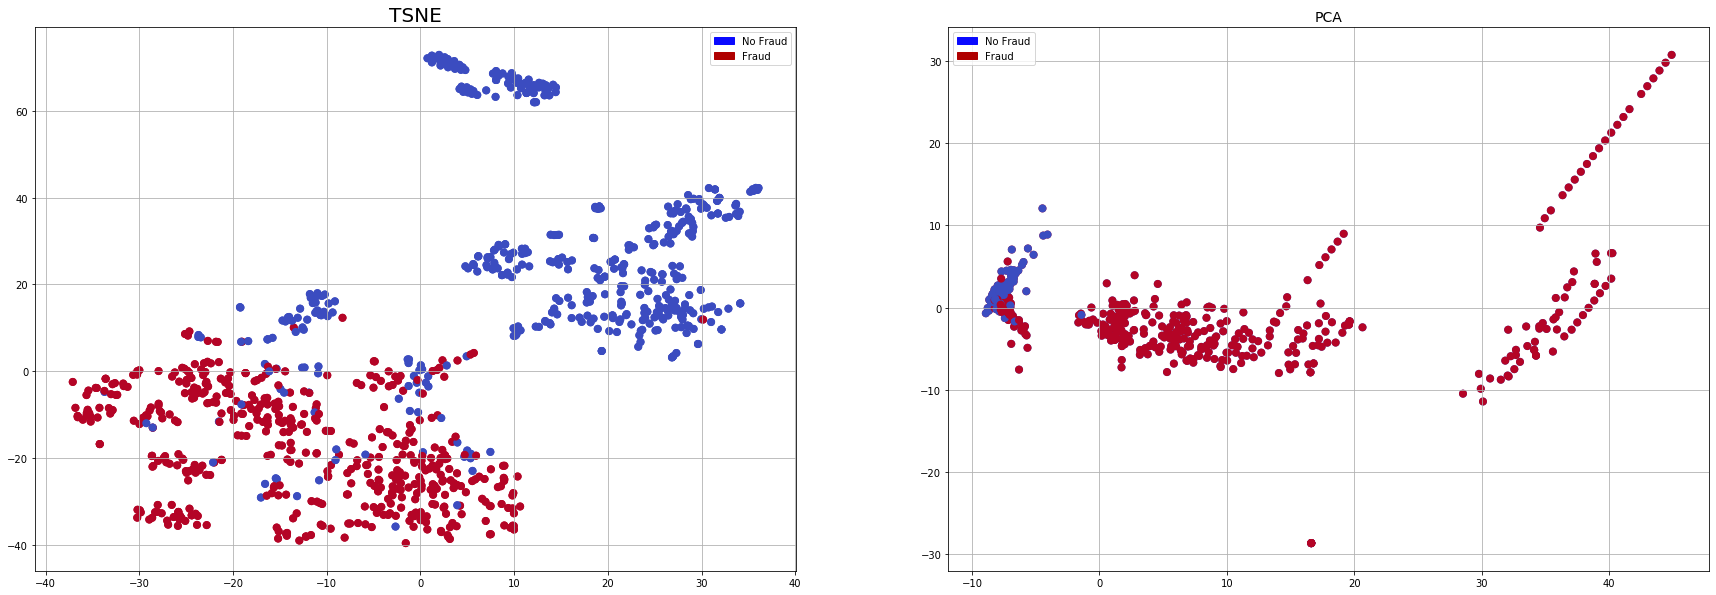

In [12]:
#tsne algorithm으로 클러스터링
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

X = new_data.drop('Class', axis=1)
y = new_data['Class']

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

#시각화
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
blue_patch = mpatches.Patch(color = '#0A0AFF', label = 'No Fraud')
red_patch = mpatches.Patch(color = '#AF0000', label = 'Fraud')

#TSNE 산점도
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c = (y == 0), cmap = 'coolwarm',
           label = 'No Fraud', linewidths = 2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c = (y == 0), cmap = 'coolwarm',
           label = 'Fraud', linewidths = 2)
ax1.set_title("TSNE", fontsize=20)
ax1.grid(True)
ax1.legend(handles = [blue_patch, red_patch])

#PCA 산점도
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c = (y == 0), cmap = 'coolwarm',
           label = 'No Fraud', linewidths = 2)
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c = (y == 1), cmap = 'coolwarm',
           label = 'Fraud', linewidths = 2)
ax2.set_title('PCA', fontsize = 14)

ax2.grid(True)

ax2.legend(handles = [blue_patch, red_patch])

4개의 분류기를 사용하여 언더샘플링
1. Logistic
2. KNearest
3. SVC
4. Decision Tree

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

#피처와 클래스 나누기
X = new_data.drop('Class', axis = 1)
y = new_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
#분류기 알고리즘에 맞추기 위해 행렬로 만들기
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#분류기 만들기
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNearest" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTreeClassifier" : DecisionTreeClassifier()
}

#교차검증
for key, classifier in classifiers.items(): #classifiers 딕셔너리의 key값과 classifier에 대해서
    classifier.fit(X_train, y_train)  #X_train과 y_train 데이터로 모형 적합
    training_score = cross_val_score(classifier, X_train, y_train, cv = 5) #5-교차검증 실행
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",
         round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [43]:
#교차검증 중에 언더샘플링
undersample_X = data.drop('Class', axis=1)
undersample_y = data['Class']

sss = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)
for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train : ", train_index, "Test : ", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[test_index], undersample_y.iloc[test_index]

Train :  [ 30473  30496  31002 ... 284804 284805 284806] Test :  [    0     1     2 ... 57017 57018 57019]
Train :  [     0      1      2 ... 284804 284805 284806] Test :  [ 30473  30496  31002 ... 113964 113965 113966]
Train :  [     0      1      2 ... 284804 284805 284806] Test :  [ 81609  82400  83053 ... 170946 170947 170948]
Train :  [     0      1      2 ... 284804 284805 284806] Test :  [150654 150660 150661 ... 227866 227867 227868]
Train :  [     0      1      2 ... 227866 227867 227868] Test :  [212516 212644 213092 ... 284804 284805 284806]
